In [ ]:
#https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497

In [1]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
if (!require("Matrix")) install.packages("Matrix")
library ("Matrix")

Loading required package: Matrix



In [3]:
if (!require("pracma")) install.packages("pracma")
library ("pracma")

Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




In [4]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    print(adj)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    print(z)
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Transition Matrix for an Undirected Network


8 x 8 sparse Matrix of class "dgCMatrix"
                    
[1,] . 1 . . . . . .
[2,] 1 . 1 1 . 1 . .
[3,] . 1 . . . . . 1
[4,] . 1 . . . 1 1 1
[5,] . . . . . . . .
[6,] . 1 . 1 . . . 1
[7,] . . . 1 . . . .
[8,] . . 1 1 . 1 . .
     [,1]
[1,]    1
[2,]    4
[3,]    2
[4,]    4
[5,]    1
[6,]    3
[7,]    1
[8,]    3
8 x 8 sparse Matrix of class "dgCMatrix"
                                                                  
[1,] .    1.0000000 .         .         . .         .    .        
[2,] 0.25 .         0.2500000 0.2500000 . 0.2500000 .    .        
[3,] .    0.5000000 .         .         . .         .    0.5000000
[4,] .    0.2500000 .         .         . 0.2500000 0.25 0.2500000
[5,] .    .         .         .         1 .         .    .        
[6,] .    0.3333333 .         0.3333333 . .         .    0.3333333
[7,] .    .         .         1.0000000 . .         .    .        
[8,] .    .         0.3333333 0.3333333 . 0.3333333 .    .        


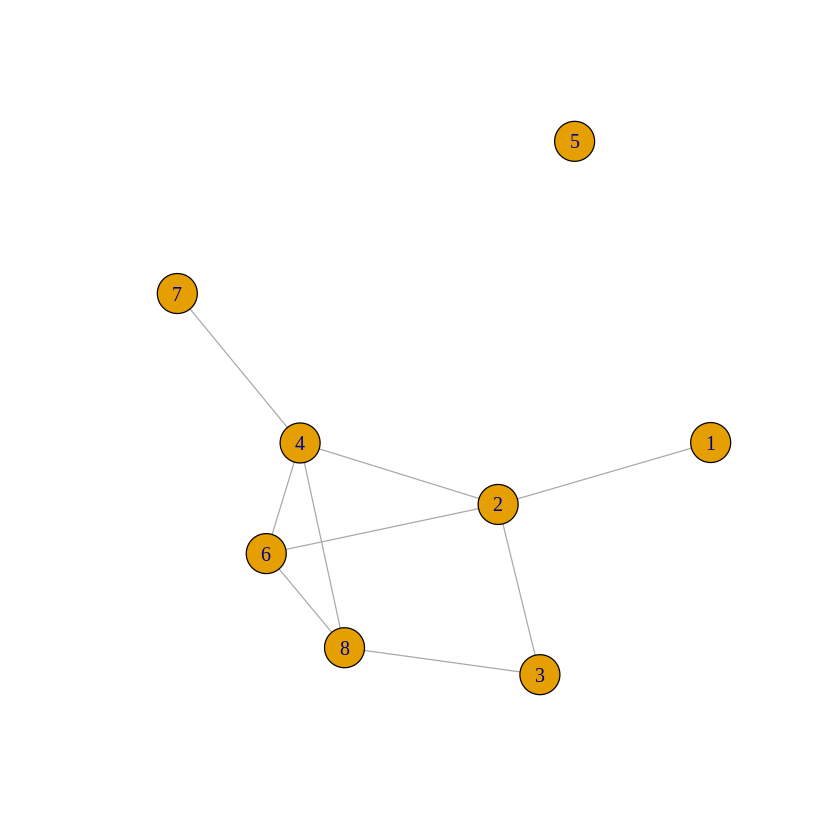

In [ ]:
set.seed(0)
g = random.graph.game(8, 0.3)
plot(g)
print(create_transition_matrix(g))

### Transition Matrix for a Directed Network

8 x 8 sparse Matrix of class "dgCMatrix"
                                                                    
[1,] .    .         .    0.5000000 0.5000000 .         .         .  
[2,] 0.20 .         .    .         0.2000000 0.2000000 0.2000000 0.2
[3,] .    0.3333333 .    0.3333333 .         0.3333333 .         .  
[4,] 0.25 .         0.25 .         0.2500000 .         0.2500000 .  
[5,] .    0.5000000 .    .         .         .         .         0.5
[6,] .    0.3333333 .    .         0.3333333 .         0.3333333 .  
[7,] .    .         .    .         .         .         1.0000000 .  
[8,] .    0.2500000 0.25 .         0.2500000 .         0.2500000 .  


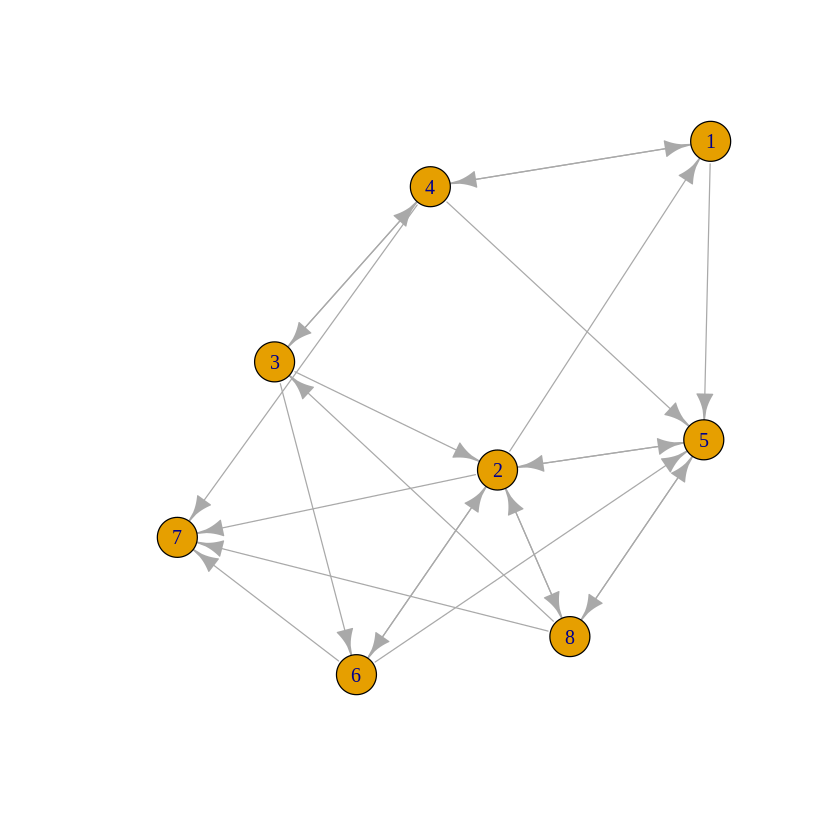

In [ ]:
set.seed(1)
g = random.graph.game(8, 0.4, directed = T)
plot(g)
print(create_transition_matrix(g))

In [ ]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        #print(PMF)
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [ ]:
set.seed(1)
v_last = random_walk(g, 15, 1)

8 x 8 sparse Matrix of class "dgCMatrix"
                    
[1,] . 1 . . . . . .
[2,] 1 . 1 1 . 1 . .
[3,] . 1 . . . . . 1
[4,] . 1 . . . 1 1 1
[5,] . . . . . . . .
[6,] . 1 . 1 . . . 1
[7,] . . . 1 . . . .
[8,] . . 1 1 . 1 . .
     [,1]
[1,]    1
[2,]    4
[3,]    2
[4,]    4
[5,]    1
[6,]    3
[7,]    1
[8,]    3
Step 1: 1
Step 2: 2
Step 3: 6
Step 4: 2
Step 5: 4
Step 6: 7
Step 7: 4
Step 8: 8
Step 9: 3
Step 10: 2
Step 11: 3
Step 12: 8
Step 13: 6
Step 14: 4
Step 15: 6


2c - both should be binomial distributions <br>
3c - both should be powwer law distributions 

Average Path length (Erdos Renyi) $$\ln(N)/\ln(Np)$$

Average Path length (Barabasi Albert) $$\ln(N)/\ln(\ln(N))$$

Page rank <br>
intuition : The importance of a node is related to the number of nodes that point to it (in-degree) <br>
logic: run multiple random walks. the node that was visited more is more important. <br>
"black hole node": node with no outgoing edge <br> 
algo steps: <br>
1)create transition matrix <br>
2)store a list visited_frequency of size n , define number of walk steps, number of iterations (say m) <br>
3) for m number of times : choose starting point (at random), perform random walk, update visiting_frequency of end node (add 1) <br>
4)sort visited_frequency list in descending order. Most visted node is the most important. <br>






In [ ]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL,tp = 0.15){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        #rn = generate a random number betweem 0 and 1 with uniform distribution 
        #if rn < tp:
          #v = sample(1:vcount(g), 1)    
        #else:
          #v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [ ]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL,tp = 0.15, pr = pr){ #pr = visited_frequncy/sum(visted_frequency)
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        #rn = generate a random number betweem 0 and 1 with uniform distribution 
        #if rn < tp:
          #v = sample(1:vcount(g), 1, prob = pr)    
        #else:
          #v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [ ]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL,tp = 0.15, pr = pr, medians = medians){ #first get median ranked pages  (2 medians)
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        #rn = generate a random number betweem 0 and 1 with uniform distribution 
        #if rn < tp:
          #v = sample(medians, 1,)    
        #else:
          #v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

##Part 2

###3(a)

In [11]:
# generate two graphs with node=900, m=4
n <- 900
set.seed(1)
g1 <- barabasi.game(900, m=4, directed = T)
g2 <- barabasi.game(900, m=4, directed = T)

In [14]:
permute_g2 = as_edgelist(permute(g2, sample(n)), names = F)
v <- as.vector(t(permute_g2))

In [16]:
# combine two graphs together
combined_graph <- add_edges(g1, v)

In [18]:
n_new <- vcount(combined_graph)

In [21]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL,teleport = FALSE, alpha=0.2){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        if (teleport == TRUE) {
          #rn = generate a random number betweem 0 and 1 with uniform distribution 
          PMF = (1-alpha) * PMF + alpha/vcount(g)
          v = sample(1:vcount(g), 1, prob = PMF)       

        } else {
          v = sample(1:vcount(g), 1, prob = PMF)        
        }
        #print(PMF)
        
    }
    
    return(v)
}

900 x 900 sparse Matrix of class "dgCMatrix"
                                                                               
  [1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [2,] 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [3,] 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [4,] 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [5,] 1 1 1 1 . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . ......
  [6,] 1 1 . 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [7,] 1 . 1 . 1 1 . . . . . . . . . . . . . . 1 . . . . . . . . . . . . ......
  [8,] 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [9,] . 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
 [10,] . 1 . 1 1 1 . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ......
 [11,] 1 1 . 1 . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ..

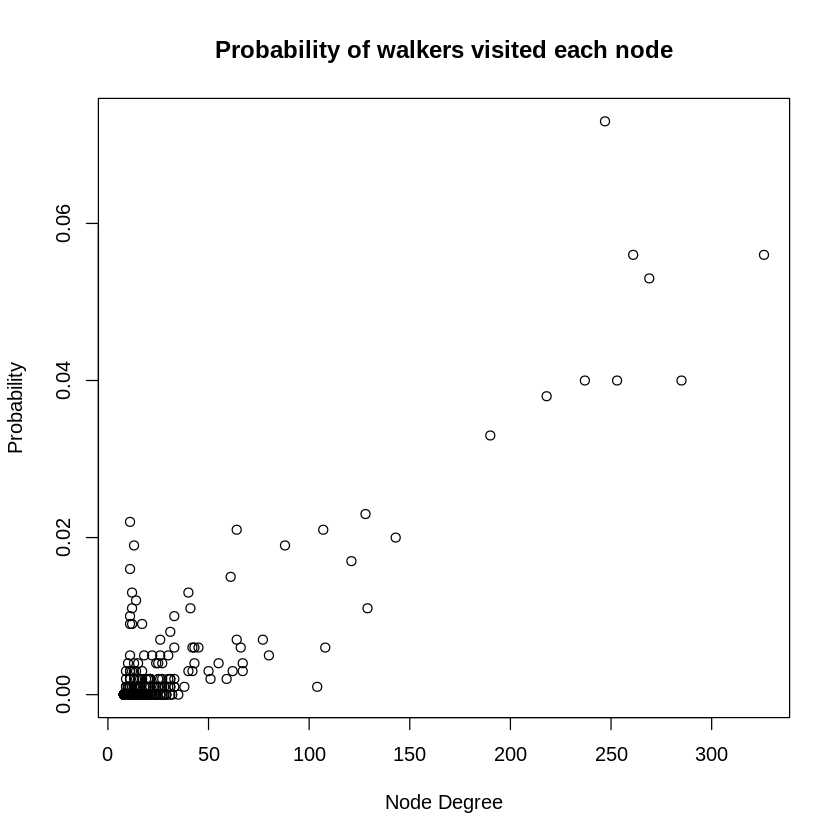

In [22]:
frequency = numeric(n_new)

total_steps = 1000
iterations = 1000

transition_combined = create_transition_matrix(combined_graph)

for (i in 0:iterations) {
  start_point = sample(1:n_new, 1)
  endp = random_walk(combined_graph, total_steps, start_point, transition_matrix=transition_combined)
  frequency[endp] = frequency[endp] + 1
}

prob = frequency / iterations

plot(degree(combined_graph), prob, main="Probability of walkers visited each node",xlab="Node Degree",ylab="Probability")

     

### 3(b)

900 x 900 sparse Matrix of class "dgCMatrix"
                                                                               
  [1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [2,] 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [3,] 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [4,] 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [5,] 1 1 1 1 . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . ......
  [6,] 1 1 . 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [7,] 1 . 1 . 1 1 . . . . . . . . . . . . . . 1 . . . . . . . . . . . . ......
  [8,] 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [9,] . 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
 [10,] . 1 . 1 1 1 . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ......
 [11,] 1 1 . 1 . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ..

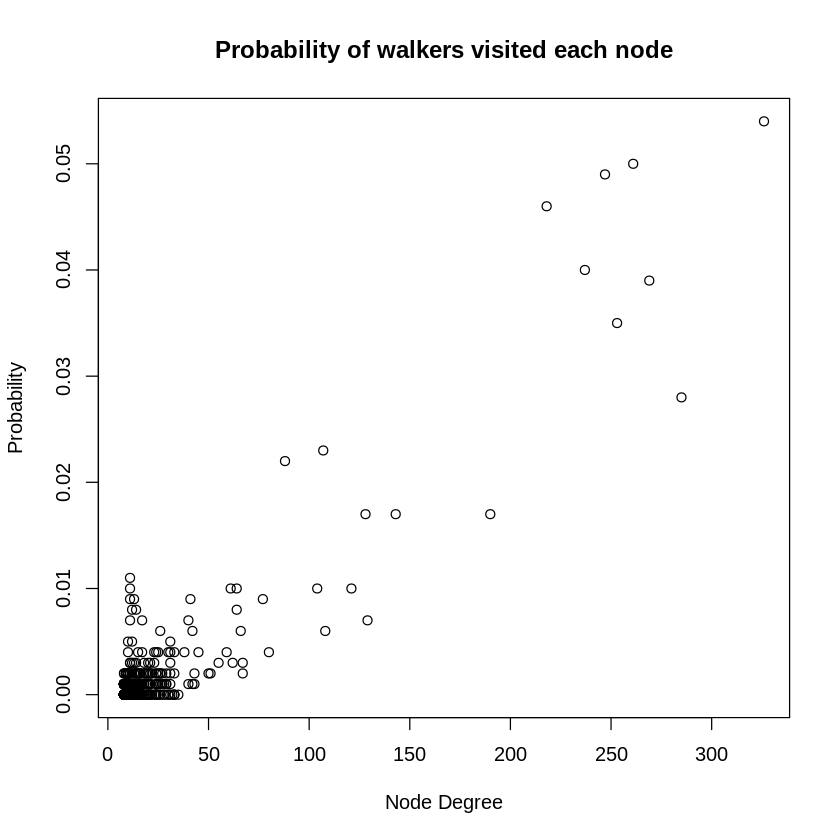

In [23]:
# Create a map to record frequency
freq=numeric(n_new)

total_steps = 1000
iterations = 1000

transition_combined = create_transition_matrix(combined_graph)

for (i in 0:iterations) {
  start_point = sample(1:n_new, 1)
  endp = random_walk(combined_graph, total_steps, start_point, transition_matrix=transition_combined, teleport=TRUE)
  freq[endp] = freq[endp] + 1
}

prob = freq / iterations

plot(degree(combined_graph), prob, main="Probability of walkers visited each node",xlab="Node Degree",ylab="Probability")